<a href="https://www.kaggle.com/code/saadatkhalid/gufhtugu-publications-analysis?scriptVersionId=123700202" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 2.csv
/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 4.csv
/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 5.csv


* Checking the Order Status
* Top 10 Cities by Most Orders
* Checking Most Used Payment Methods
* Checking The Top 6 Cities For Orders by COD

# Importing CSV File

In [2]:
import pandas as pd

# Dataset GP Orders - 5

In [3]:
data = pd.read_csv("/kaggle/input/gufhtugu-publications-dataset-challenge/GP Orders - 5.csv")

In [4]:
#Checking First 10 Rows of Dataset

data.head(n=10)

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
0,307,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 15:03,faisalabad,NaN,2,200.0
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0
5,312,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 18:17,FSD,Cash on Delivery (COD),5,200.0
6,313,Completed,Bitcoin Blockchain aur Crypto Currency - FREE ...,10/3/2019 19:04,Lahore,NaN,2,200.0
7,315,Completed,Global Science - Issue 219/R ka Taaruf آر کا ...,10/3/2019 19:34,Karach,Cash on Delivery (COD),2,200.0
8,316,Completed,Har Shaye Ka Nazria - ہر شے کا نظریہ/Molo Masa...,10/3/2019 20:27,Karachi,Cash on Delivery (COD),2,200.0
9,3162,Completed,(C++) ++سی/سی/A Brief History of Money/Band ka...,11/12/2019 12:40,Islamabad,Cash on delivery,8,200.0


In [5]:
data.shape

(19239, 8)

In [6]:
#Checking for the Null Values

data.isnull().sum()

Order Number             0
Order Status             0
Book Name                2
Order Date & Time        0
City                     1
Payment Method          10
Total items              0
Total weight (grams)     0
dtype: int64

In [7]:
# Droping Null Values

data.dropna(inplace = True)

In [8]:
data.isnull().sum()

Order Number            0
Order Status            0
Book Name               0
Order Date & Time       0
City                    0
Payment Method          0
Total items             0
Total weight (grams)    0
dtype: int64

In [9]:
data.head(n=10)

,Order Number,Order Status,Book Name,Order Date & Time,City,Payment Method,Total items,Total weight (grams)
1,308,Completed,Kaggle for Begginers,10/3/2019 15:54,Rawalpindi,Cash on Delivery (COD),1,200.0
2,309,Completed,Kaggle for Begginers/Bitcoin Blockchain aur Cr...,10/3/2019 16:09,Hyderabad,Cash on Delivery (COD),2,200.0
3,310,Cancelled,Kaggle for Begginers,10/3/2019 16:42,Rawalpindi,Cash on Delivery (COD),1,200.0
4,311,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 16:44,Karachi,Cash on Delivery (COD),1,200.0
5,312,Completed,Bit Coin Block Chain aur Crypto Currency بٹ کو...,10/3/2019 18:17,FSD,Cash on Delivery (COD),5,200.0
7,315,Completed,Global Science - Issue 219/R ka Taaruf آر کا ...,10/3/2019 19:34,Karach,Cash on Delivery (COD),2,200.0
8,316,Completed,Har Shaye Ka Nazria - ہر شے کا نظریہ/Molo Masa...,10/3/2019 20:27,Karachi,Cash on Delivery (COD),2,200.0
9,3162,Completed,(C++) ++سی/سی/A Brief History of Money/Band ka...,11/12/2019 12:40,Islamabad,Cash on delivery,8,200.0
10,3170,Completed,Data Structures,11/12/2019 14:30,Nankana Sahib,Cash on delivery,1,200.0
11,3182,Completed,Data Structures/Bit Coin Block Chain aur Crypt...,11/12/2019 17:38,Sialkot,Cash on delivery,2,200.0


# Checking the Order Status

In [10]:
# Checking the Order Status

data['Order Status'].value_counts()

Completed    17937
Returned      1140
Cancelled      149
Name: Order Status, dtype: int64

# # Visualization of The Order Status 

In [11]:
import matplotlib.pyplot as plt

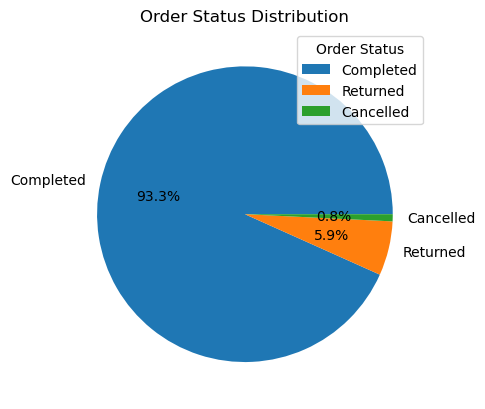

In [12]:
# Visualization of The Order Status 

order_status = data['Order Status'].value_counts()

# Create a pie chart
plt.pie(order_status.values, labels=order_status.index, autopct='%1.1f%%')

# Set the chart title
plt.title('Order Status Distribution')
plt.legend(title="Order Status")

# Display the chart
plt.show()


# Top 10 Cities by Most Orders

In [13]:
#Checking For The Top 10 Cities

data['City'].value_counts().head(10)

Karachi       2330
Lahore        1992
Islamabad      858
Rawalpindi     645
Faisalabad     478
Peshawar       427
Multan         427
Gujranwala     262
karachi        253
Hyderabad      240
Name: City, dtype: int64

# Visualization of Top 10 Cities

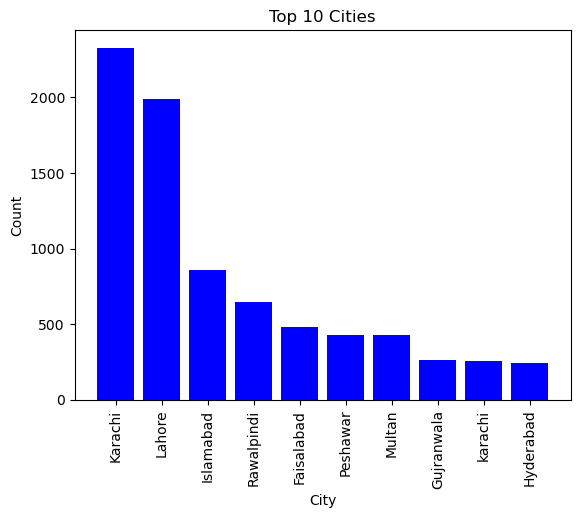

In [14]:
# Visualization of Top Cities

top_10_cities = data['City'].value_counts().head(10)

# Create a bar chart
plt.bar(top_10_cities.index, top_10_cities.values, color='blue')

# Set the chart title
plt.title("Top 10 Cities")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=90)

# Display the chart
plt.show()


# Checking Most Used Payment Methods

In [15]:
data['Payment Method'].value_counts() 

Cash on delivery          17470
EasyPaisa                   696
JazzCash                    596
BankTransfer                457
Cash on Delivery (COD)        7
Name: Payment Method, dtype: int64

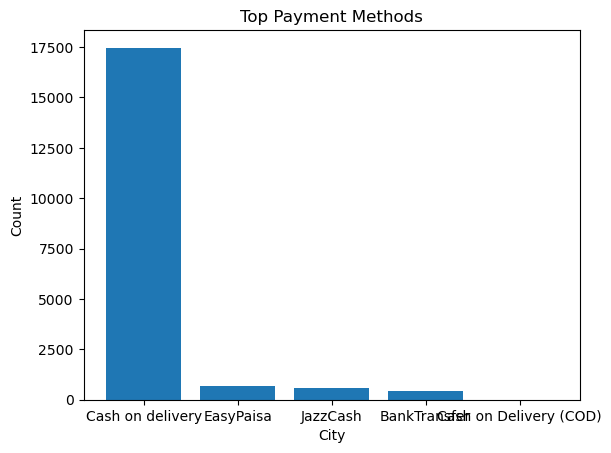

In [16]:
paying_Method = data['Payment Method'].value_counts()

# creating the bar chart
plt.bar(paying_Method.index, paying_Method.values)

# Set the chart title
plt.title("Top Payment Methods")
plt.xlabel("City")
plt.ylabel("Count")

# show the plot
plt.show()


# Checking The Top 6 Cities For Orders by COD

In [17]:
# Checking The Top 6 Cities For Orders by COD

cities = ['Karachi', 'Lahore', 'Islamabad', 'Rawalpindi', 'Faisalabad', 'Peshawar']
payment_methods = ['Cash on delivery']

filtered_data = data[(data['City'].isin(cities)) & (data['Payment Method'].isin(payment_methods))]

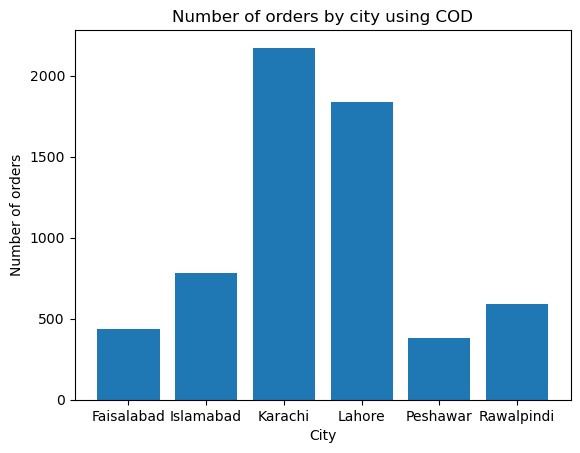

In [18]:
# group the data by city and count the number of rows in each group
city_counts = filtered_data.groupby('City').size()

# create a bar chart of the city counts
plt.bar(city_counts.index, city_counts.values)

# set the chart title and axis labels
plt.title('Number of orders by city using COD')
plt.xlabel('City')
plt.ylabel('Number of orders')

# show the chart
plt.show()
